#                               MSAI-632 Application of AI in Risk Management
                                                   Homework 7
                                                   

# Part 2: Practical Exercise - Regression Model Evaluation

Objective: To apply concepts of regression modeling, evaluation metrics, and visualization to a real-world dataset. You will train a regression model to predict a continuous financial-like outcome and analyze its performance and feature importance.

In [1]:
#load the standard libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

#  1) a.load the California Housing dataset.

In [2]:
# fetch data
california_housing=fetch_california_housing()
#convert into dataframe
california_data=pd.DataFrame(california_housing.data,columns=california_housing.feature_names) 
#selct/fatch the target and save into dataframe
california_data['MEDV']=california_housing.target 


In [3]:
print('-------------------------------print the data---------------------------------------------')
california_data.head()

-------------------------------print the data---------------------------------------------


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
print('-------------------------------DataFrame info----------------------------------------------')
california_data.info()
print('-------------------------------Data shapes--------------------------------------------------')
print('Row , Cols',california_data.shape)
print('-----------------------------------NULL Values-----------------------------------------------')
california_data.isnull().sum()


-------------------------------DataFrame info----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
-------------------------------Data shapes--------------------------------------------------
Row , Cols (20640, 9)
-----------------------------------NULL Values-----------------------------------------------


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

In [5]:
#Describe statistics
california_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# b.Separate the features (X) from the target variable (MEDV, y).

In [6]:
# seperate the features in 'X' and 'y'
X=california_data.drop('MEDV',axis=1)
y=california_data['MEDV']

# Split the data into training (80%) and testing (20%) sets.

In [8]:
#split the data training  and testing size
X_train,X_test,y_train ,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
After spliting the data we find the shape of training and testing data let's see

In [10]:
len(X_train)

16512

 # d. Print confirmation of data loading and split sizes

In [8]:
print("Dataset loaded successfully!")
print(f"Total samples: {len(california_data)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Dataset loaded successfully!
Total samples: 20640
Training samples: 16512
Testing samples: 4128


# 2.Model Training

In [23]:
# initilize the random forest regressor
rf_regressor=RandomForestRegressor(n_estimators=100,random_state=42)

In [24]:
#Train the ramdom forest regressor
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [25]:
# b. Confirmation of model training
print("Random Forest Regressor has been trained successfully!")

Random Forest Regressor has been trained successfully!


# 3.Prediction and Metric Calculation:

 # a) Use your trained model to make predictions on the test set.

In [26]:
# Make predictions
y_pred=rf_regressor.predict(X_test)

# b )Calculate the Mean Squared Error (MSE) and R-squared (R2) Score for your predictions

In [27]:
#calculate_metrics
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# c. Print the metrics
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.2554
R-squared (R²) Score: 0.8051


In [30]:
# sample prediction for testing
#single_data=X_test.iloc[0].values.reshape(1,-1)
#predicted_value=rf_regressor.predict(single_data)
#print(f'Predicted_value:{predicted_value[0]:.2f}')
#print(f'actual_value:{y_test.iloc[0]:.2f}')

# 4 .Visualization of Results:

a) .Create three distinct visualizations that help evaluate and interpret your model's performance: 

 b.Actual vs. Predicted Values Plot: A scatter plot comparing the true values of MEDV in the test set against your model's predicted MEDV values. Include a diagonal line representing perfect predictions.

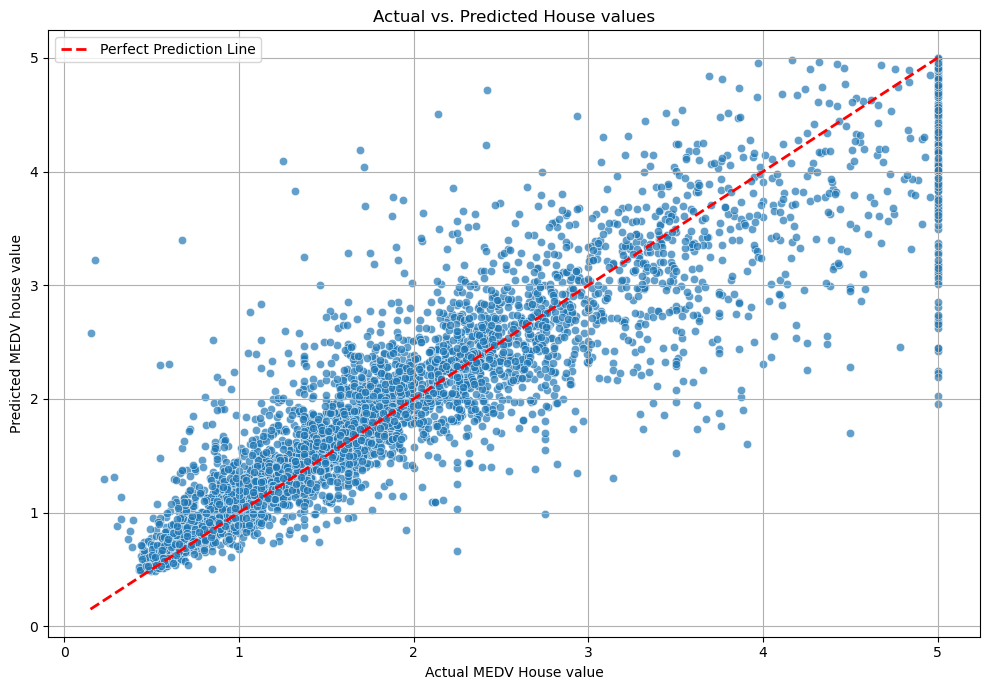

In [34]:
#Model performance Visualizations
# 1. Actual vs Predicted values plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--',lw=2,label='Perfect Prediction Line')  # Perfect prediction line
plt.xlabel("Actual MEDV House value")
plt.ylabel("Predicted MEDV house value")
plt.title("Actual vs. Predicted House values")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("actual_vs_predicted.png")
plt.show()

c) Residuals Plot: A scatter plot of the residuals (Actual - Predicted) against the predicted values. Include a horizontal line at y=0.

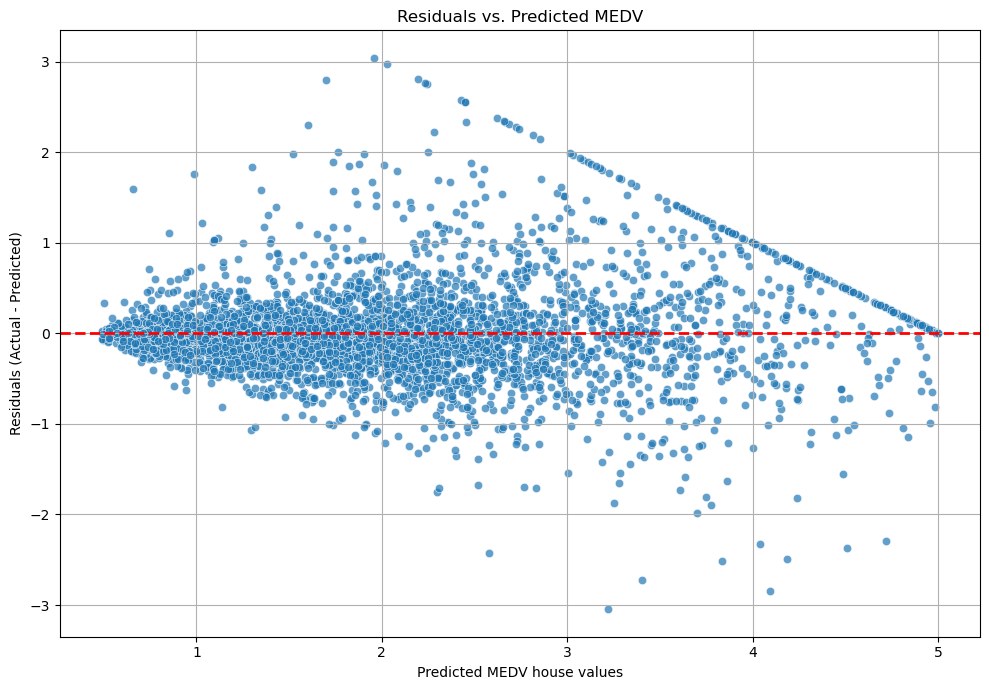

In [35]:
# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--',lw=2)
plt.xlabel("Predicted MEDV house values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted MEDV")
plt.grid(True)
plt.tight_layout()
plt.savefig("residuals_plot.png")
plt.show()

d .Feature Importances Plot: A bar plot showing the importance of each feature in your trained regression model.

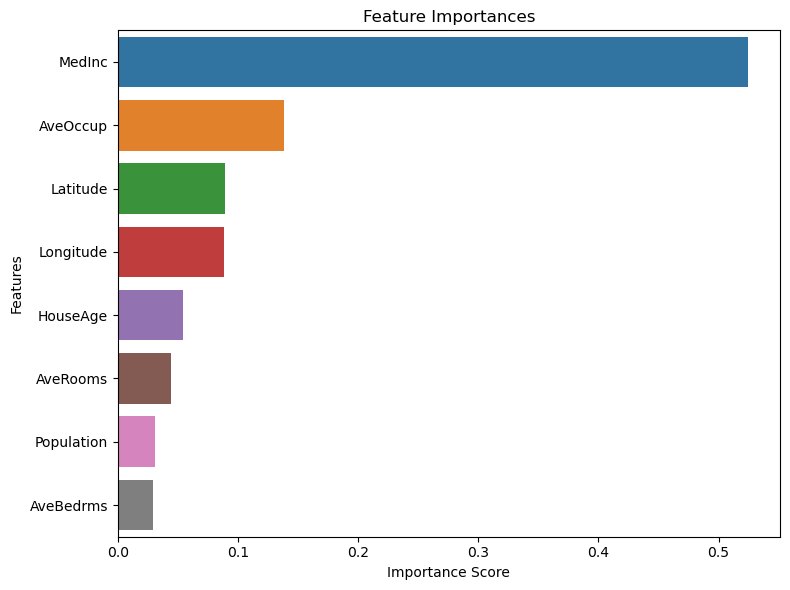

In [37]:
# 3. Feature Importances Plot
importances = rf_regressor.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("feature_importances.png")

step 5 :Interpretation and Discussion i write question and answer in doc file.

**Thank you!!**